## Welcome to the Browser Wars (1995 - )
<p><img src="https://assets.datacamp.com/production/project_1172/img/browser.png" alt="Browser on desktop, tablet, and phone"></p>
<p>In the mid 1990s, the First Browser War began with Netscape Navigator and Microsoft Internet Explorer fighting for dominance. By 2001, Internet Explorer was the clear winner, but it was not long before the Second Browser Wars began (2004-2017). This coincided with the rise of smartphones, which emphasized the need and competitiveness for more mobile-friendly versions of browsers. <a href="https://en.wikipedia.org/wiki/Browser_wars">[1]</a></p>
<p>In this notebook, we'll analyze the worldwide popularity of browsers over time using Google Trends. Although this won't give us direct market share figures, we can use Google Trends to get a sense of interest of a given browser over time and how that interest compares to other browsers. In particular, we will be looking at five major players over the past two decades: Mozilla Firefox (2002-), Apple's Safari (2002-), Google Chrome (2008-), Microsoft Internet Explorer (1995-2020), and Opera (1995-).</p>
<p>The dataset you will use was downloaded as a CSV from this <a href="https://trends.google.com/trends/explore?date=all&q=%2Fm%2F01dyhm,%2Fm%2F0168s_,%2Fm%2F04j7cyf,%2Fm%2F03xw0,%2Fm%2F01z7gs">Google Trends query</a> in mid-October of 2020. Here are the details:</p>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/worldwide_browser_trends.csv</b></div>
This is a time series indexed by month with the search interest for each browser.
<ul>
    <li><b>Month:</b> each month from 2004-01 to 2020-10</li>
    <li><b>Firefox:</b> search interest for Firefox</li>
    <li><b>Safari:</b> search interest for Safari</li>
    <li><b>Google Chrome:</b> search interest for Chrome</li>
    <li><b>Internet Explorer:</b> search interest for Internet Explorer</li>
    <li><b>Opera:</b> search interest for Opera</li>
</ul>
</div>
<p>Google defines the values of search interest as:</p>
<blockquote>
  <p>Numbers represent search interest relative to the highest point on the chart for the given region and time. A value of 100 is the peak popularity for the term. A value of 50 means that the term is half as popular. A score of 0 means there was not enough data for this term.</p>
</blockquote>
<p>Best of luck and may the best browser win!</p>

# Importing Data

In [50]:
# Use this cell to begin your analysis, and add as many as you would like!

import pandas as pd

trends = pd.read_csv('datasets/worldwide_browser_trends.csv')
trends.info()
trends.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Month              202 non-null    object
 1   Firefox            202 non-null    int64 
 2   Safari             202 non-null    int64 
 3   Google Chrome      202 non-null    int64 
 4   Internet Explorer  202 non-null    int64 
 5   Opera              202 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 9.6+ KB


,Month,Firefox,Safari,Google Chrome,Internet Explorer,Opera
0,2004-01,12,2,2,37,9
1,2004-02,20,2,2,39,9
2,2004-03,18,2,2,34,8
3,2004-04,20,2,2,33,9
4,2004-05,20,2,2,35,9


# Finding Rolling Average

In [51]:
#converting 'Month' datetime
trends['Month'] = pd.to_datetime(trends['Month'])
#Setting index to 'Month' and finding 6 month rolling average
trends.set_index('Month', inplace = True)
rolling_six = trends.rolling(6).mean()





# Calculating Quarterly Percent Change

In [52]:
#calculating quarterly percent change and converting to dec to %
pct_change_quarterly = trends.pct_change(3)*100

#Filtering out years before 2009
pct_change_quarterly = pct_change_quarterly.loc['2009-01-01':]
pct_change_quarterly.head(10)

,Firefox,Safari,Google Chrome,Internet Explorer,Opera
Month,,,,,
2009-01-01,4.545455,25.000000,0.000000,9.090909,0.000000
2009-02-01,-1.515152,20.000000,0.000000,9.090909,-9.090909
2009-03-01,-7.042254,40.000000,-13.333333,20.000000,-8.333333
2009-04-01,-7.246377,0.000000,23.076923,20.833333,-9.090909
2009-05-01,-6.153846,-16.666667,25.000000,8.333333,0.000000
2009-06-01,-6.060606,0.000000,15.384615,-16.666667,-9.090909
2009-07-01,14.062500,20.000000,12.500000,-6.896552,0.000000
2009-08-01,18.032787,0.000000,20.000000,0.000000,10.000000
2009-09-01,8.064516,-14.285714,33.333333,-4.000000,30.000000


# Creating DateDrame to compare Chrome's annual Google Trends performance in 2009, 2012, 2015, and 2018

In [54]:
#creating empty dataframe
chrome_trends = pd.DataFrame()

#looping through list of years and concatenating the values for each year
for year in ['2009', '2012', '2015', '2018']:
    chrome_trends_per_year = trends.loc[year, ['Google Chrome']].reset_index(drop=True)
    chrome_trends_per_year.rename(columns={'Google Chrome': year}, inplace=True)
    chrome_trends = pd.concat([chrome_trends, chrome_trends_per_year], axis=1)

chrome_trends


,2009,2012,2015,2018
0,13,52,48,24
1,12,50,45,24
2,13,47,42,24
3,16,47,47,22
4,15,48,46,23
5,15,45,43,22
6,18,51,44,20
7,18,53,43,21
8,20,50,41,25
9,21,48,40,23


# Visualizing Answers

## 6 Month Rolling Average Plot 

<AxesSubplot:title={'center':'6 Month Rolling Average'}, xlabel='Month'>

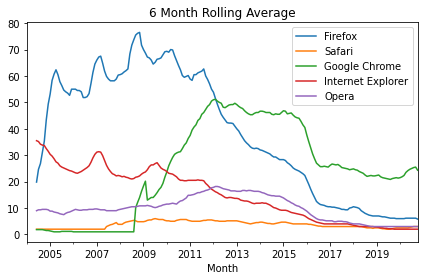

In [55]:
rolling_six.plot(title="6 Month Rolling Average")



## Percent Quarterly Change Plot

array([<AxesSubplot:xlabel='Month'>, <AxesSubplot:xlabel='Month'>,
       <AxesSubplot:xlabel='Month'>, <AxesSubplot:xlabel='Month'>,
       <AxesSubplot:xlabel='Month'>], dtype=object)

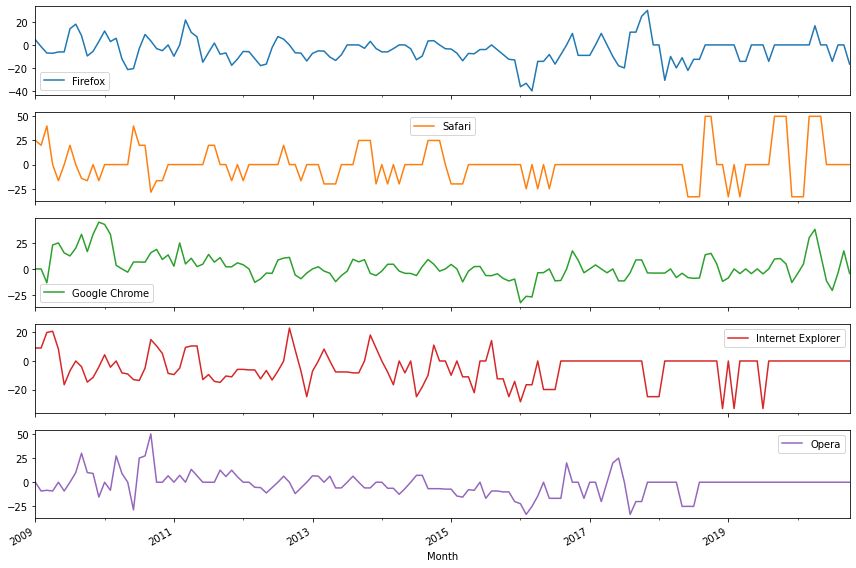

In [56]:
pct_change_quarterly.plot(subplots=True, figsize=(12,8))


## Chrome Trends Plot

<AxesSubplot:title={'center':'Chrome Search Performance in 2009, 2012, 2015 & 2018'}>

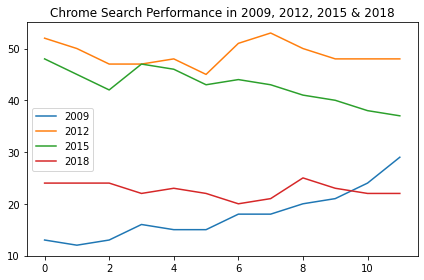

In [57]:
chrome_trends.plot(title="Chrome Search Performance in 2009, 2012, 2015 & 2018")